### Pytorch

Pytorch is an open source deep learning library developed by the Facebook AI research group, based on Torch.  Essentially, it provides the user with two main utilies :
 1. It allows to perform Tensor/vector computation on the GPU with an API similar (but not compatible) to Numpy.
 2. It records all computation to be able to backpropagate through them. That is, provided a sequence of operations that starts from a tensor $\theta$ to define a scalar $g(\theta)$, it is able to compute $\nabla_\theta g(\theta)$ exactly, with only one function call.
 
 ![](images/pytorch.JPG)

## Steps to create an ML App 
To create a machine learning app, we must follow these steps : 

1. Gathering data
2. Data pre-processing
3. Researching the model that will be best for the type of data
4. Training and testing the model
5. Evaluation
6. Deploy 

<img src="images/steps.PNG" alt="Drawing" style="width: 700px;"/> 


### Logistic regression

For regression analysis we can use **The linear regression machine learning algorithm**, but when it comes to classification we use **logistic regression** which models the probabilities for classification problems with two possible outcomes. So it’s an extension of the linear regression model for classification problems (to tackle multi-class classification problems, variants of logistic regression exist e.g., the One-vs-All or One-vs-One approaches)

A linear model treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single feature, it is a line) that minimizes the distances between the points and the hyperplane. it gives estimated values below zero and above one which means that there is no meaningful threshold at which you can distinguish one class from the other. So we need to squash the output of the linear equation into a range of [0,1]. To do this, we perform a non-linear transform on output using the sigmoid function :

![](./images/sigmoid_fn.png)
![](./images/sigmoid.png)

In the linear regression model, we have modelled the relationship between outcome and features with a linear equation:

![](./images/linear.png)

For classification using logistic regression, we wrap the right side of the equation into the logistic function. This forces the output to assume only values between 0 and 1 interpreted as the probability of having an **input** in a **class C** :

![](./images/squeezed.png)

We can reformulate the equation that only the linear term is on the right side of the formula :

![](./images/logodd.png)

The term in the log() function is called "odds", and wrapped in the logarithm it is called "log odds". We can see that the logistic regression model is a linear model for the log odds.

For the cost we use a logarithmic loss function to calculate the cost for misclassifying :
![](./images/cost.png)

The above cost function can be rewritten as below since calculating gradients from the above equation is difficult :
![](./images/compact.png)

We take partial derivatives of the cost function with respect to each parameter(theta_0, theta_1, …) to obtain the gradients :
![](./images/gradient.png)

Neural networks are somewhat related to logistic regression. Basically, we can think of logistic regression as a one layer neural network :
![](./images/lrnn.png)

## Neural Networks 
Now that we understand how each block of a neural networks works, we can easily understand the whole process. 

<img src="images/neural.PNG" alt="Drawing" style="width: 700px;"/> 

### FeedForward 

<img src="images/feed.PNG" alt="Drawing" style="width: 500px;"/> 

### Backpropagation 

Backpropagation is the central mechanism by which neural networks learn. It is the messenger telling the network whether or not the net made a mistake when it made a prediction.

Our goal with backpropagation is to update each of the weights in the network so that they cause the actual output to be closer the target output, thereby minimizing the error for each output neuron and the network as a whole.


### Tensors 

**What is a tensor?**

The inputs, outputs, and transformations within neural networks are all represented using tensors, and as a result, neural network programming utilizes tensors heavily.

```A tensor is the primary data structure used by neural networks.```

Tensors support some additional enhancements which make them unique: Apart from CPU, they can be loaded or the GPU for faster computations. 

Before we dive in with specific tensor operations, let’s get a quick overview of the landscape by looking at the main operation categories that encompass the operations we’ll cover. We have the following high-level categories of operations:

1. Reshaping operations
2. Element-wise operations
3. Reduction operations
4. Access operations

The goal of this section is to not only showcase specific tensor operations commonly used, but to also describe the operation landscape. Having knowledge of the types of operations that exist can stay with us longer than just knowing or memorizing individual operations.


In [1]:
import torch 

In [2]:
a = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [3]:
a.shape

torch.Size([3, 4])

In [4]:
a.numel()

12

In [5]:
a.reshape([1,12])

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [6]:
a.reshape([1,12]).squeeze()

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [7]:
a.reshape([3,4])

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

In [8]:
a.view(1, -1).squeeze()

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

### Autograd
On setting .requires_grad = True in pytorch tensors they start forming a backward graph that tracks every operation applied on them to calculate the gradients using something called a dynamic computation graph (DCG).

**Autograd:** This class is an engine to calculate derivatives (Jacobian-vector product to be more precise). It records a graph of all the operations performed on a gradient enabled tensor and creates an acyclic graph called the dynamic computational graph. The leaves of this graph are input tensors and the roots are output tensors. Gradients are calculated by tracing the graph from the root to the leaf and multiplying every gradient in the way using the chain rule.

In [9]:
import torch

# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
y = torch.tensor(2.0)
z = x * y

# Displaying
for i, name in zip([x, y, z], "xyz"):
    print(f"{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\n\
grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n")

x
data: 1.0
requires_grad: True
grad: None
grad_fn: None
is_leaf: True

y
data: 2.0
requires_grad: False
grad: None
grad_fn: None
is_leaf: True

z
data: 2.0
requires_grad: True
grad: None
grad_fn: <MulBackward0 object at 0x7f04548beeb8>
is_leaf: False



To stop PyTorch from tracking the history and forming the backward graph, the code can be wrapped inside with ``` torch.no_grad():``` It will make the code run faster whenever gradient tracking is not needed.

In [10]:
import torch
# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
z = x ** 3
z.backward() #Computes the gradient 
print(x.grad.data) #Prints '3' which is dz/dx 

tensor(3.)


### Concrete example 
In this example we're going to build an ML APP that detects the type of clothes in an image. We're going to use the standard Fashion MNIST dataset. 
This dataset 

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
from torchvision import datasets, transforms

class FashionMNIST(datasets.MNIST):
    """`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.

    Args:
        root (string): Root directory of dataset where ``Fashion-MNIST/processed/training.pt``
            and  ``Fashion-MNIST/processed/test.pt`` exist.
        train (bool, optional): If True, creates dataset from ``training.pt``,
            otherwise from ``test.pt``.
        download (bool, optional): If true, downloads the dataset from the internet and
            puts it in root directory. If dataset is already downloaded, it is not
            downloaded again.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
    """
    urls = [
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
    ]
    classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import numpy as np

Here we're going to work with the fashion MNIST dataset. 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data

trainset = FashionMNIST('./F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('./F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

```
class DatasetTransformer(torch.utils.data.Dataset):

    def __init__(self, base_dataset, transform):
        self.base_dataset = base_dataset
        self.transform = transform

    def __getitem__(self, index):
        img, target = self.base_dataset[index]
        return self.transform(img), target

    def __len__(self):
        return len(self.base_dataset)


train_dataset = DatasetTransformer(train_dataset, transforms.ToTensor())
valid_dataset = DatasetTransformer(valid_dataset, transforms.ToTensor())
test_dataset  = DatasetTransformer(test_dataset , transforms.ToTensor())
```

In [13]:
len(trainset)

60000

In [14]:
trainset.train_labels.unique()

/home/rifux/anaconda2/envs/pytorch/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
trainset.train_labels.bincount()

/home/rifux/anaconda2/envs/pytorch/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

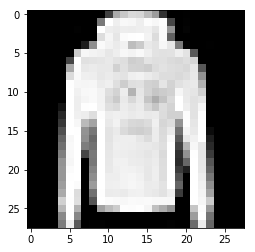

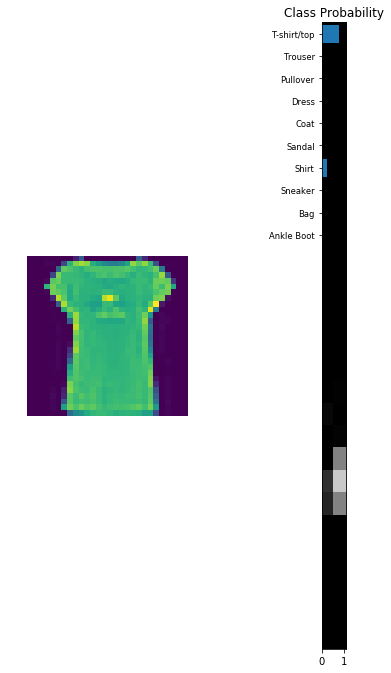

In [36]:
import matplotlib.pyplot as plt 

image, label = next(iter(trainloader))

plt.imshow(image[0,:].squeeze(), cmap="gray")
plt.show()


In [37]:
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [38]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [39]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.515413916711487
Training loss: 0.3917721413504849
Training loss: 0.35961190372832547
Training loss: 0.33329101770258407
Training loss: 0.3195688672570277


In [42]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [48]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')

#### Validation & dropout 

In [49]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.513..  Test Loss: 0.437..  Test Accuracy: 0.842
Epoch: 2/30..  Training Loss: 0.388..  Test Loss: 0.409..  Test Accuracy: 0.854
Epoch: 3/30..  Training Loss: 0.354..  Test Loss: 0.395..  Test Accuracy: 0.855
Epoch: 4/30..  Training Loss: 0.333..  Test Loss: 0.400..  Test Accuracy: 0.856
Epoch: 5/30..  Training Loss: 0.315..  Test Loss: 0.384..  Test Accuracy: 0.864
Epoch: 6/30..  Training Loss: 0.301..  Test Loss: 0.368..  Test Accuracy: 0.869
Epoch: 7/30..  Training Loss: 0.291..  Test Loss: 0.359..  Test Accuracy: 0.875
Epoch: 8/30..  Training Loss: 0.282..  Test Loss: 0.378..  Test Accuracy: 0.870
Epoch: 9/30..  Training Loss: 0.275..  Test Loss: 0.366..  Test Accuracy: 0.878
Epoch: 10/30..  Training Loss: 0.268..  Test Loss: 0.368..  Test Accuracy: 0.876
Epoch: 11/30..  Training Loss: 0.260..  Test Loss: 0.379..  Test Accuracy: 0.871
Epoch: 12/30..  Training Loss: 0.256..  Test Loss: 0.376..  Test Accuracy: 0.875
Epoch: 13/30..  Training Loss: 0.245.

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

### CNNs 
CNNs are a type of deep layer neural networks, used to learn Filters that when convolved with the image, can be used to extract features. 

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
cnn = CNN();
#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.03);